In [1]:
import numpy as np
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from synphot import SourceSpectrum
from arte.photometry.filters import Filters
from arte.photometry.normalized_star_spectrum import get_normalized_star_spectrum

Text(0.5, 0, 'Wavelength [μm]')

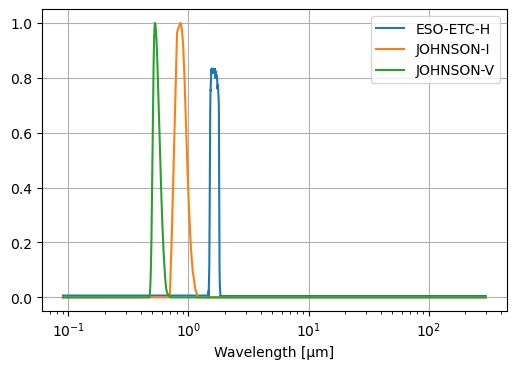

In [2]:
vegasp = SourceSpectrum.from_vega()
filt_name_H = Filters.ESO_ETC_H
filt_H = Filters.get(filt_name_H)
filt_name_I = Filters.JOHNSON_I
filt_I = Filters.get(filt_name_I)
filt_name_V = Filters.JOHNSON_V
filt_V = Filters.get(filt_name_V)
wv_broad = vegasp.waveset
wv_H = filt_H.waveset
wv_I = filt_I.waveset

mpl.rcParams['figure.dpi'] = 100
plt.semilogx(wv_broad.to(u.um), filt_H(wv_broad), label='ESO-ETC-H')
plt.semilogx(wv_broad.to(u.um), filt_I(wv_broad), label='JOHNSON-I')
plt.semilogx(wv_broad.to(u.um), filt_V(wv_broad), label='JOHNSON-V')
plt.grid()
plt.legend()
plt.xlabel('Wavelength [μm]')

Text(0.5, 0, 'Wavelength [μm]')

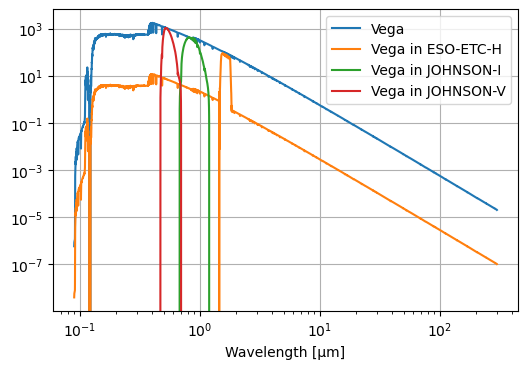

In [3]:
vega_H = vegasp * filt_H
vega_I = vegasp * filt_I
vega_V = vegasp * filt_V

plt.loglog(wv_broad.to(u.um), vegasp(wv_broad), label='Vega')
plt.loglog(wv_broad.to(u.um), vega_H(wv_broad), label='Vega in ESO-ETC-H')
plt.loglog(wv_broad.to(u.um), vega_I(wv_broad), label='Vega in JOHNSON-I')
plt.loglog(wv_broad.to(u.um), vega_V(wv_broad), label='Vega in JOHNSON-V')
plt.grid()
plt.legend()
plt.xlabel('Wavelength [μm]')

34293.87716560575 Angstrom PHOTLAM
9910.09898110043 Angstrom PHOTLAM
214971.58858256607 Angstrom PHOTLAM


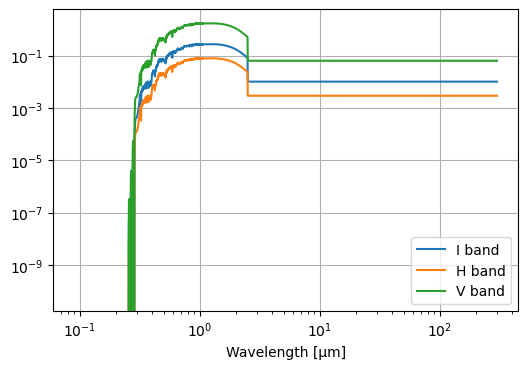

In [4]:
# sp_I = get_normalized_star_spectrum('vega', 8, filt_name_I)
# sp_H = get_normalized_star_spectrum('vega', 8, filt_name_H)
# sp_V = get_normalized_star_spectrum('vega', 8, filt_name_V)
sp_I = get_normalized_star_spectrum('M0V', 8, filt_name_I)
sp_H = get_normalized_star_spectrum('M0V', 8, filt_name_H)
sp_V = get_normalized_star_spectrum('M0V', 8, filt_name_V)

plt.loglog(wv_broad.to(u.um), sp_I(wv_broad), label='I band')
plt.loglog(wv_broad.to(u.um), sp_H(wv_broad), label='H band')
plt.loglog(wv_broad.to(u.um), sp_V(wv_broad), label='V band')
plt.grid()
plt.legend()
plt.xlabel('Wavelength [μm]')

print(np.trapz(sp_I(wv_broad), wv_broad))
print(np.trapz(sp_H(wv_broad), wv_broad))
print(np.trapz(sp_V(wv_broad), wv_broad))

200849.17299244655 Angstrom PHOTLAM
34293.87716560575 Angstrom PHOTLAM


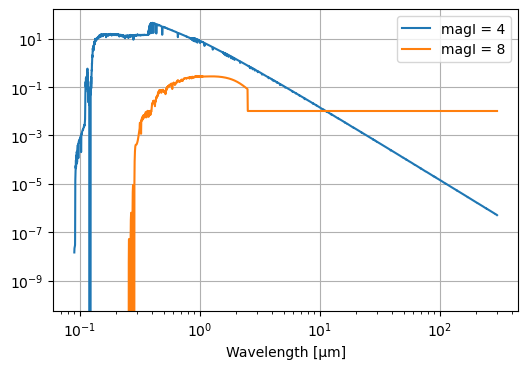

In [5]:
sp_I_4 = get_normalized_star_spectrum('vega', 4, filt_name_I)

plt.loglog(wv_broad.to(u.um), sp_I_4(wv_broad), label='magI = 4')
plt.loglog(wv_broad.to(u.um), sp_I(wv_broad), label='magI = 8')
plt.grid()
plt.legend()
plt.xlabel('Wavelength [μm]')

print(np.trapz(sp_I_4(wv_broad), wv_broad))
print(np.trapz(sp_I(wv_broad), wv_broad))

Text(0.5, 0, 'Wavelength [μm]')

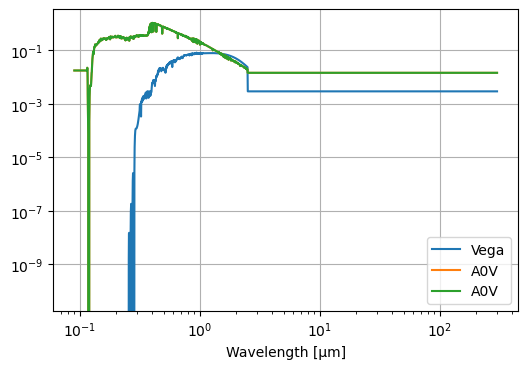

In [6]:
spA0V_H_8 = get_normalized_star_spectrum('A0V', 8, filt_name_H)
spA0V_V_8 = get_normalized_star_spectrum('A0V', 8, filt_name_V)


plt.loglog(wv_broad.to(u.um), sp_H(wv_broad), label='Vega')
plt.loglog(wv_broad.to(u.um), spA0V_H_8(wv_broad), label='A0V')
plt.loglog(wv_broad.to(u.um), spA0V_V_8(wv_broad), label='A0V')
plt.grid()
plt.legend()
plt.xlabel('Wavelength [μm]')